In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data =COCO('train.json')

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


In [3]:
ratios=[]
for value in data.anns.values():
    ratios.append(value['bbox'][2]/value['bbox'][3])
ratios = np.array(ratios)

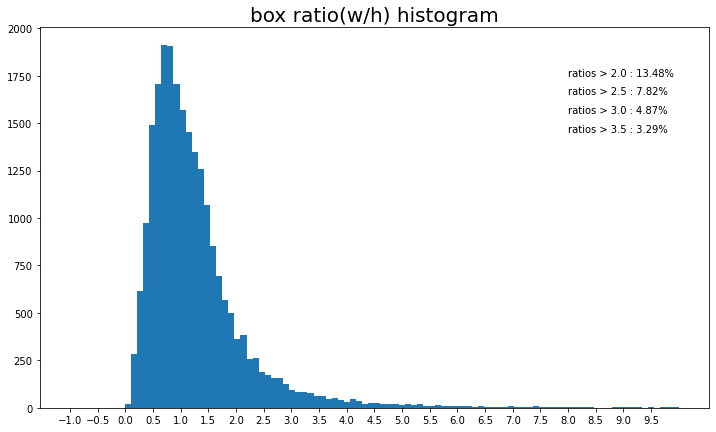

In [4]:
plt.figure(figsize=(12,7))
plt.hist(x=ratios,bins=100,range=(-1,10))
plt.xticks(ticks=list(np.arange(-1,10,0.5)))
plt.title('box ratio(w/h) histogram',fontsize=20)

plt.text(8, 1750,f"ratios > 2.0 : {len(ratios[ratios>2.0])/len(ratios)*100:.2f}%")
plt.text(8, 1750-100,f"ratios > 2.5 : {len(ratios[ratios>2.5])/len(ratios)*100:.2f}%")
plt.text(8, 1750-200,f"ratios > 3.0 : {len(ratios[ratios>3.0])/len(ratios)*100:.2f}%")
plt.text(8, 1750-300,f"ratios > 3.5 : {len(ratios[ratios>3.5])/len(ratios)*100:.2f}%")
plt.show()

In [5]:
print(f"ratios > 2.0 : {len(ratios[ratios>2.0])/len(ratios)*100:.2f}%")
print(f"ratios > 2.5 : {len(ratios[ratios>2.5])/len(ratios)*100:.2f}%")
print(f"ratios > 3.0 : {len(ratios[ratios>3.0])/len(ratios)*100:.2f}%")
print(f"ratios > 3.5 : {len(ratios[ratios>3.5])/len(ratios)*100:.2f}%")

ratios > 2.0 : 13.48%
ratios > 2.5 : 7.82%
ratios > 3.0 : 4.87%
ratios > 3.5 : 3.29%


In [6]:
areas=[]
for value in data.anns.values():
    areas.append(value['area'])
areas = np.array(areas)

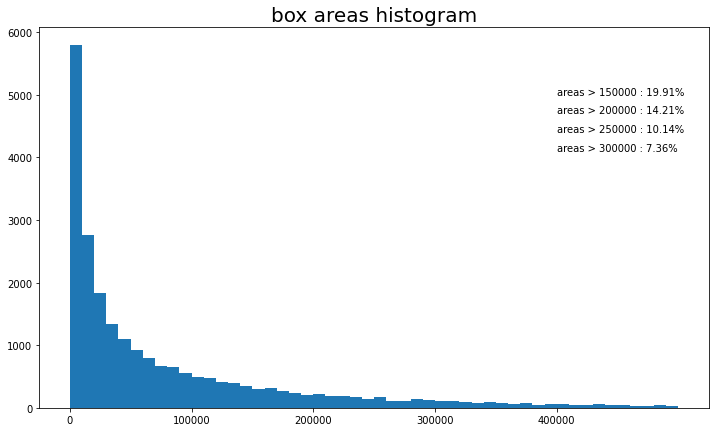

In [7]:
plt.figure(figsize=(12,7))
plt.hist(x=areas,bins=50,range=(0,5e+5))
plt.xticks(ticks=list(np.arange(0,5e+5,1e+5)))
plt.title('box areas histogram',fontsize=20)
plt.text(4e+5, 5e+3,f"areas > 150000 : {len(areas[areas>150000])/len(areas)*100:.2f}%")
plt.text(4e+5, 5e+3 -300,f"areas > 200000 : {len(areas[areas>200000])/len(areas)*100:.2f}%")
plt.text(4e+5, 5e+3 -600,f"areas > 250000 : {len(areas[areas>250000])/len(areas)*100:.2f}%")
plt.text(4e+5, 5e+3-900,f"areas > 300000 : {len(areas[areas>300000])/len(areas)*100:.2f}%")
plt.show()

In [101]:
print(f"areas > 150000 : {len(areas[areas>150000])/len(areas)*100:.2f}%")
print(f"areas > 200000 : {len(areas[areas>200000])/len(areas)*100:.2f}%")
print(f"areas > 250000 : {len(areas[areas>250000])/len(areas)*100:.2f}%")
print(f"areas > 300000 : {len(areas[areas>300000])/len(areas)*100:.2f}%")

areas > 150000 : 19.91%
areas > 200000 : 14.21%
areas > 250000 : 10.14%
areas > 300000 : 7.36%


In [20]:
len(areas[areas<5000])/len(areas)*100

15.628240580712063

In [23]:
import pandas as pd

In [92]:
data =COCO('kfold/cv_train1.json')

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [93]:
s_dataset = data.dataset

pd_s_dataset = pd.DataFrame(s_dataset['annotations'])

pd_s_dataset[pd_s_dataset['area']< 5000]

annos = list()
for small_obj in pd_s_dataset[pd_s_dataset['area']< 5000].values:
    anno=dict()
    anno['image_id'] = small_obj[0]
    anno['category_id'] = small_obj[1]
    anno['area'] = small_obj[2]
    anno['bbox'] = small_obj[3]
    anno['iscrowd'] = small_obj[4]
    anno['id'] = small_obj[5]
    annos.append(anno)

In [94]:
s_dataset['annotations'] = annos

In [96]:
import json
with open('cv_train1_small.json','w') as f:
    json.dump(s_dataset,f)